In [11]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
color_list = ['salmon', 'mediumturquoise', 'limegreen', 'cornflowerblue', 'fuchsia', 'khaki']

import copy as cp
import pickle
import pandas as pd
from ipywidgets import IntProgress
from IPython.display import display
from datetime import date
#import pylustrator
#pylustrator.start()


import RandomPEPS as rpeps
import StructureMatrixGenerator as smg
import trivialSimpleUpdate as tsu
import DoubleEdgeFactorGraphs as defg
import SimpleUpdate as su
import bmpslib as bmps
print(date.today())

2020-07-20


In [2]:
my_file = '10x10_random_PEPS.npy'
file = 'data/data' + my_file
params = 'data/parameters' + my_file
data = np.load(file, allow_pickle=True)
parameters = np.load(params, allow_pickle=True)

In [3]:
print(parameters)

[list(['ATD', 'BP', 'tSU']) list(['N x M', [10, 10]])
 list(['bond_dimensions', [2, 3, 4]]) list(['bc', 'open']) list(['d', 2])
 list(['dw', 1e-06]) list(['BP t_max', 1000]) list(['BP epsilon', 1e-10])
 list(['BP dumping', 0.0]) list(['tSU t_max', 1000])
 list(['num of experiments', 20])]


In [4]:
# unpack parameters
N, M = parameters[1][1][0], parameters[1][1][1]
bond_dimensions = parameters[2][1]
num_experiments = parameters[10][1]


# unpack data
ATD_D = data[0]
T_BP_D = data[1]
T_SU_D = data[2]

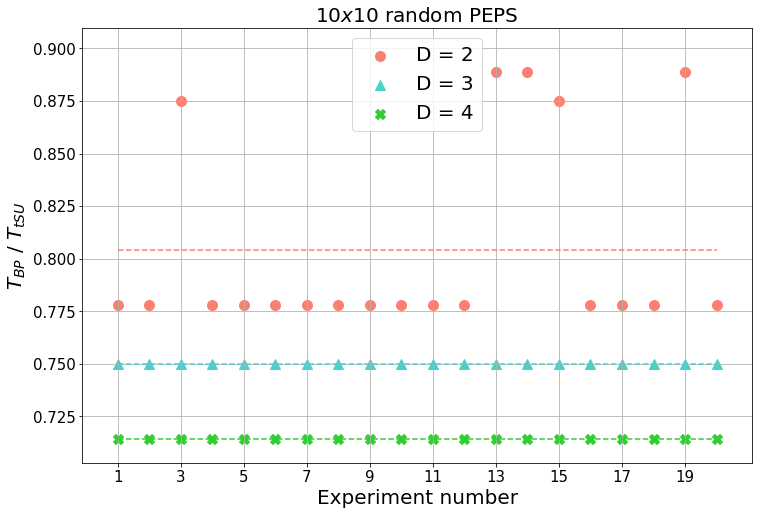

In [13]:
#name = 'Ground state of ' + '$' + str(N) + ' x ' + str(M) + '$'  + ' AFH'
#name = 'Ground state of ' + '$' + str(N) + ' x ' + str(M) + '$'  + ' AFH with random couplings'
name = '$' + str(N) + ' x ' + str(M) + '$'  + ' random PEPS'
file_name = name + '_' + str(date.today())
plt.figure(figsize=(12, 8))
fonts = 20
my_markers = ['o', '^', 'X']
for i, D in enumerate(bond_dimensions):
    my_label = 'D = ' + str(D) 
    plt.scatter(range(1, num_experiments + 1),
                np.asarray(T_BP_D[i]) / np.asarray(T_SU_D[i]),
                marker=my_markers[i],
                color=mcd.CSS4_COLORS[color_list[i]], 
                s=100,
                label=my_label)
    
    plt.plot(range(1, num_experiments + 1),
             np.mean(np.asarray(T_BP_D[i]) / np.asarray(T_SU_D[i])) * np.ones((num_experiments, 1)),
             '--',
             color=mcd.CSS4_COLORS[color_list[i]])
    
plt.title(name, fontsize=fonts)
plt.xlabel('Experiment number', fontsize=fonts)
plt.ylabel('$T_{BP}$ / $T_{tSU}$', fontsize=fonts)
plt.xticks(list(range(1, num_experiments + 1, 2)), fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=fonts)
plt.grid()
#plt.ylim([0, 10])
#plt.savefig('images/' + file_name + '.svg', format="svg")
#plt.savefig('images/' + file_name + '.pdf')
plt.show()